## BBM 409 - Programming Assignment 1

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Yusuf Demir 2210356074

The tasks involved in the assignment include:

* Implementation: Developing the Perceptron Learning Algorithm from scratch and training it on the dataset.
* Evaluation and Metrics: Assessing the model's performance using accuracy, precision, recall, and F1 score, while emphasizing the importance of these metrics and the use of validation data.
* Visualization: Reducing the feature space to two dimensions to visualize the hyperplane generated by the Perceptron, and comparing class separation in both 2D and 1D using Fisher’s Linear Discriminant.

## Understanding Perceptron Learning Algorithm (100 points +5 points)

### 1. Data Loading and Exploration (5 points)
* Brief overview of the task.
* Description of the dataset used for analysis.

In [34]:
## Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
# Features and target variables
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [36]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)

# Convert the features (X) and target (y) to Numpy arrays for further processing
X = X.to_numpy()
y = y.to_numpy()

def check_variable_type(variable):
    """
    Check the type of the given variable and print its type.

    Parameters:
    variable: The variable to check (could be a pandas DataFrame or NumPy array).
    """
    if type(variable) == pd.DataFrame:
        print(f"The variable is a pandas DataFrame.")
    elif type(variable) == np.ndarray:
        print(f"The variable is a NumPy array.")
    else:
        print(f"The variable is neither a pandas DataFrame nor a NumPy array.")

check_variable_type(X)
check_variable_type(y)

The variable is a NumPy array.
The variable is a NumPy array.


In [37]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.

# Set the feature names manually based on the known dataset description
feature_names = ['variance', 'skewness', 'curtosis', 'entropy']

# Print the shape of the features and target arrays
print("\nShape of Features:", X.shape)
print("Shape of Target:", y.shape)

Data = pd.DataFrame(X, columns=feature_names)

# Display summary statistics for the features
print("\nSummary Statistics for Features:\n", pd.DataFrame(X, columns=feature_names).describe())

# Check for missing values in the dataset
print("\nChecking for Missing Values:\n", pd.DataFrame(X, columns=feature_names).isnull().sum())

# Display a few rows of the dataset to understand its structure
print("\nFirst 5 Rows of the Dataset:\n", pd.DataFrame(X, columns=feature_names).head())



Shape of Features: (1372, 4)
Shape of Target: (1372, 1)

Summary Statistics for Features:
           variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500

Checking for Missing Values:
 variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

First 5 Rows of the Dataset:
    variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880


The dataset used for analysis consists of 1,372 samples with 4 features: variance, skewness, curtosis, and entropy. There are no missing values in any of the features, ensuring data integrity for analysis. 

In [38]:
# Convert the DataFrame to a Numpy array

In [39]:
from scipy import stats # For the shapiro-wilk test.
print(Data.columns)

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')


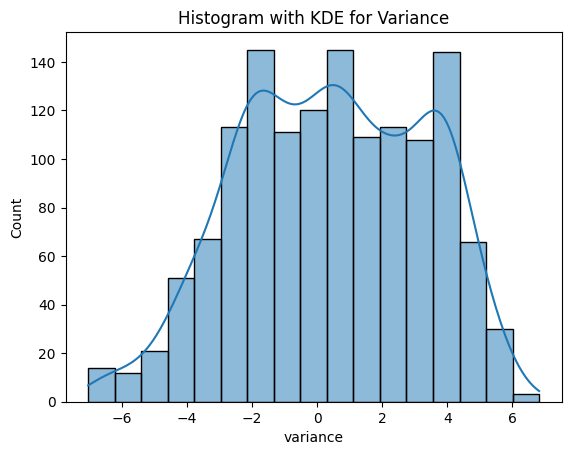

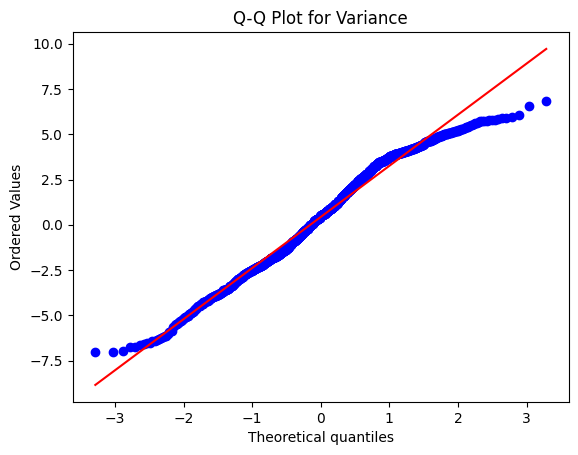

p value : 4.6861656122741085e-12
ShapiroResult(statistic=0.9819974938117768, pvalue=4.6861656122741085e-12)
Not a normal distribution


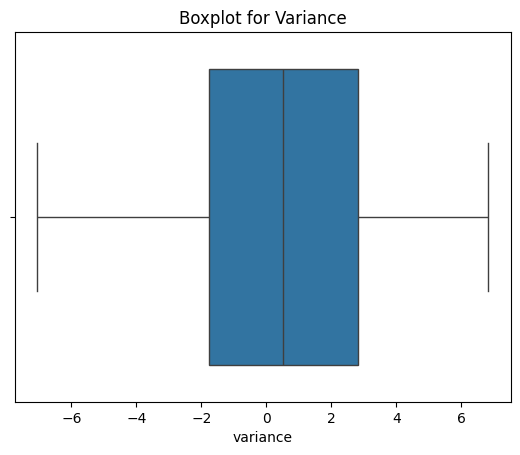

In [40]:
# Histogram
sns.histplot(Data['variance'], kde=True)
plt.title('Histogram with KDE for Variance')
plt.show()

# Q-Q Plot
stats.probplot(Data['variance'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Variance')
plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(Data['variance'])
print('p value :', shapiro_test.pvalue)
print(stats.shapiro(Data['variance']))
if (shapiro_test.pvalue < 0.05):
    print("Not a normal distribution")

# Boxplot
sns.boxplot(x=Data['variance'])
plt.title('Boxplot for Variance')
plt.show()

In [41]:
# Function to find outliers using the IQR method
def find_outliers_iqr(df):
    outlier_indices = []  # List to store the indices of outliers

    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the indices of outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())  # Add indices to the list

        print(f"Outliers for {column}:\n", outliers)

    # Remove duplicate indices
    unique_outliers = list(set(outlier_indices))
    return unique_outliers

# Find outliers
outliers = find_outliers_iqr(Data)
print("Indices of all outliers:", outliers)


Outliers for variance:
 Empty DataFrame
Columns: [variance, skewness, curtosis, entropy]
Index: []
Outliers for skewness:
 Empty DataFrame
Columns: [variance, skewness, curtosis, entropy]
Index: []
Outliers for curtosis:
       variance  skewness  curtosis   entropy
765    -3.8483  -12.8047   15.6824 -1.281000
780    -3.5801  -12.9309   13.1779 -2.567700
815    -3.1128   -6.8410   10.7402 -1.017200
816    -4.8554   -5.9037   10.9818 -0.821990
820    -4.0025  -13.4979   17.6772 -3.320200
821    -4.0173   -8.3123   12.4547 -1.437500
826    -4.2110  -12.4736   14.9704 -1.388400
841    -3.8858  -12.8461   12.7957 -3.135300
877    -5.1216   -5.3118   10.3846 -1.061200
881    -4.4861  -13.2889   17.3087 -3.219400
882    -4.3876   -7.7267   11.9655 -1.454300
887    -3.2692  -12.7406   15.5573 -0.141820
902    -2.8957  -12.0205   11.9149 -2.755200
937    -2.9020   -7.6563   11.8318 -0.842680
938    -4.3773   -5.5167   10.9390 -0.408200
942    -3.3793  -13.7731   17.9274 -2.032300
943    -3.127

___Through the analysis of these graphs, we have identified the presence of outliers in our dataset and observed that it does not follow a normal distribution. This insight will guide us in selecting the appropriate feature scaling technique to apply.___

### 2. Data Preprocessing (5 points)
Explain the preprocessing steps taken and their rationale.

#### Feature Scaling Techniques:
Feature scaling is important for many machine learning algorithms, especially those based on distance metrics (e.g., k-nearest neighbors, support vector machines) and gradient descent optimization (e.g., linear regression, logistic regression).

Some common feature scaling techniques include:

1. **Standardization (Z-score normalization):** It scales the features to have a mean of 0 and a standard deviation of 1.
2. **Min-Max Scaling:** It scales the features to a fixed range, typically between 0 and 1.
3. **Robust Scaling:** It scales the features based on percentiles, making it robust to outliers.

You can use these scaled features for training your machine learning models.

Remember, the choice of feature selection and feature scaling techniques can significantly impact the performance of your models. It's essential to experiment and choose the techniques that work best for your specific dataset and machine learning tasks.

### Feature Scaling Method Choices:
___Z-score Normalization:
Z-score normalization, also known as standardization, scales features to have a mean of 0 and a standard deviation of 1. This method is sensitive to outliers because it centers the data by the mean and scales it by the standard deviation. Given that our data is not normally distributed, as indicated by the Shapiro-Wilk test results, and due to the presence of outliers detected via the IQR method, Z-score normalization may not be appropriate in this case. The impact of outliers can lead to skewed mean and standard deviation values, distorting the scaling process.___

___Min-Max Scaling:
Min-max scaling rescales the features to a fixed range, typically between 0 and 1. While this method can be effective for normalizing data, it is also sensitive to outliers. The presence of extreme values can compress the range of the rest of the data, potentially resulting in misleading interpretations. In our dataset, where outliers have been identified, min-max scaling may not provide an accurate representation of the underlying distributions of the features.___

___Robust Scaling:
Robust scaling is designed to be resilient against outliers, as it scales the data based on the median and the interquartile range (IQR). By focusing on these statistics, robust scaling effectively normalizes the features while ignoring extreme values. This makes it a suitable choice in cases where outliers are present or suspected, as is the case with our dataset. Given the findings from the Shapiro-Wilk test and the IQR outlier analysis, robust scaling is the most appropriate method to ensure that the feature scaling process remains unaffected by extreme values.___



In [42]:
## Analyze the dataset and decide whether scaling is needed. 
## Explain your choices in a brief comment. 

from sklearn.preprocessing import RobustScaler

# Create a RobustScaler instance
scaler = RobustScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame for easier analysis
df_scaled = pd.DataFrame(X_scaled, columns=['variance', 'skewness', 'curtosis', 'entropy'])

# Display summary statistics for the features before RobustScaler
print("\nSummary Statistics for Features:\n", pd.DataFrame(X, columns=feature_names).describe())

# Summary statistics of scaled features
print("\nSummary Statistics of Scaled Features:\n", df_scaled.describe())


Summary Statistics for Features:
           variance     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500

Summary Statistics of Scaled Features:
            variance      skewness     curtosis      entropy
count  1.372000e+03  1.372000e+03  1372.000000  1372.000000
mean  -1.359127e-02 -4.661563e-02     0.164274    -0.215438
std    6.187350e-01  6.886269e-01     0.906568     0.748155
min   -1.640727e+00 -1.888194e+00    -1.241576    -2.835047
25%   -4.938932e-01 -4.725956e-01    -0.460980    -0.650510
50%    6.030875e-18 -2.612927e-17     0.00

### How Robust Scaling Works
Robust scaling is a technique used to standardize features in a dataset while being resilient to the influence of outliers. This method utilizes the median and the interquartile range (IQR) to scale the data, making it particularly effective for datasets that may contain extreme values.

Median Calculation:

The median of each feature is computed. The median is the middle value in a sorted list of numbers, which makes it less sensitive to outliers compared to the mean.
Interquartile Range (IQR):

The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the feature. The IQR represents the range within which the central 50% of the data falls, effectively capturing the variability of the data while ignoring extreme values.

Scaling Formula:

Each value in the feature is then transformed using the following formula: 
Scaled Value= (X−median) / IQR
 
Where X is the original value, and the median and IQR are specific to the feature being scaled.

#### Training and Validation Split
1. Explain why it’s important to use the validation set to evaluate your model instead
of relying solely on the training data. 
2. Discuss how evaluating the model on unseen
data helps in assessing its generalization capability.

### Importance of Using a Validation Set:

* ___It is crucial to use a validation set to evaluate your model because it provides an unbiased assessment of the model's performance. Relying solely on the training data can lead to an overly optimistic estimate of the model's accuracy, as the model might simply memorize the training examples rather than learning to generalize from them. This is known as overfitting.___
* ___The validation set acts as a stand-in for unseen data, allowing you to test how well the model can predict outcomes for new data points that it hasn't encountered during training. This is vital in understanding whether the model has truly learned the underlying patterns in the data or if it has just memorized the training examples.___

### Evaluating on Unseen Data:

* ___Evaluating the model on unseen data helps in assessing its generalization capability. Generalization refers to the model's ability to perform well on unseen data that is representative of the problem domain.___
* ___If a model performs well on both the training and validation sets, it indicates that the model has effectively learned the relevant features and can apply this knowledge to make predictions in real-world scenarios.___
* ___Conversely, if the model performs well on the training set but poorly on the validation set, it suggests that the model may not generalize effectively and is likely overfitting. This reinforces the necessity of using a validation set to ensure that the model is robust and can make reliable predictions in practice.___

In [43]:
check_variable_type(X)

The variable is a NumPy array.


In [44]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (1097, 4)
Shape of X_test: (275, 4)
Shape of Y_train: (1097, 1)
Shape of Y_test: (275, 1)


In [45]:
check_variable_type(X)

The variable is a NumPy array.


___Preprocessing steps applied to the data include checking for missing values, ensuring there are none across the features. Additionally, exploratory data analysis was performed to summarize the statistics of each feature, providing insights into their distributions and variability. Feature scaling will also be applied to normalize the feature values, enhancing the performance of the classification models by ensuring that all features contribute equally to the distance calculations used in the algorithms. This preparation ensures that the data is clean and ready for analysis and modeling.___

### 3. Implementing Perceptron for Binary Classification (20 points)

Explain the reason behind the application of perceptron learning algorithm on this type of data.

The Perceptron Learning Algorithm is applied to the Banknote Authentication Dataset because it is a classic binary classification problem where the goal is to distinguish between two classes based on numerical features. The dataset contains features (variance, skewness, kurtosis, and entropy) that are likely to have distinct distributions for the two classes, making it suitable for a linear classifier like the Perceptron.

The Perceptron is particularly effective for linearly separable data, where a linear decision boundary can accurately separate the two classes. Since the algorithm learns by adjusting weights based on misclassified samples, it can efficiently identify and exploit the underlying patterns in the feature space, making it a practical choice for this type of classification task.

In [46]:
## Implement Percepton Learning Algorithm

# Step 1: Initialize weights and bias
def initialize_parameters(n_features):
    w = np.zeros(n_features)  # Initialize weights to zeros
    b = 0.0                   # Initialize bias to zero
    return w, b

# Step 2: Set learning rate and epochs
learning_rate = 0.01  # Learning rate
n_epochs = 1000       # Number of epochs

# Initialize weights and bias
n_features = X_train.shape[1]
weights, bias = initialize_parameters(n_features)

# Activation function (step function)
def step_function(z):
    return 1 if z >= 0 else 0

# Training the Perceptron
def train_perceptron(X, y, weights, bias, learning_rate, n_epochs):
    for epoch in range(n_epochs):
        for i in range(len(X)):
            # Compute the weighted sum
            weighted_sum = np.dot(X[i], weights) + bias
            
            # Make a prediction
            prediction = step_function(weighted_sum)
            
            # Update weights and bias if the prediction is incorrect
            if prediction != y[i]:
                update = learning_rate * (y[i] - prediction)  # Compute the update
                weights += update * X[i]  # Update weights
                bias += update  # Update bias

    return weights, bias


Discuss how the choice of learning rate and the number of epochs might affect the
training process. What happens with a very small or very large learning rate?

## Learning Rate Effects
### Very Small Learning Rate:
* Causes slow convergence, leading to long training times.
* May result in the model getting stuck in local minima, failing to find the optimal weights.
* Makes it difficult for the model to effectively adjust weights due to minimal updates.
### Very Large Learning Rate:
* Can lead to divergence, where the model overshoots optimal weight values.
* Causes fluctuations in weight updates, preventing the model from stabilizing.
* May result in complete failure to learn, as the model cannot converge.

## Effect of Number of Epochs
### Too Few Epochs:
* Leads to underfitting, where the model fails to capture the underlying patterns in the data.
* Results in incomplete learning and higher training error.
### Too Many Epochs:
* Can cause overfitting, where the model memorizes the training data but performs poorly on unseen data.
* Increases training time without significant performance gains, wasting computational resources.
* After a certain point, additional epochs yield diminishing returns on performance improvement.

#### Train the Perceptron

In [47]:
## Train the Perceptron model on the training set.

weights, bias = train_perceptron(X_train, y_train.flatten(), weights, bias, learning_rate, n_epochs)

#### Prediction on Training Data

In [48]:
# Predicting on the training data
# Accuracy implementation

def predict(X, weights, bias):
    predictions = []
    for i in range(len(X)):
        weighted_sum = np.dot(X[i], weights) + bias
        predictions.append(step_function(weighted_sum))
    return np.array(predictions)

# Calculate accuracy
predictions_train = predict(X_train, weights, bias)
accuracy_train = np.mean(predictions_train == y_train.flatten()) * 100  # Calculate accuracy in percentage

print("Training Accuracy:", accuracy_train)

Training Accuracy: 98.90610756608933


### 4. Evaluating Perceptron for Binary Classification (25 points)

#### Prediction on Validation Data

In [49]:
# Predicting on the training data
y_pred_train = predict(X_train, weights, bias)

# Predicting on the test data
y_pred_test = predict(X_test, weights, bias)

# Print the predictions to verify
print("Training Predictions:", y_pred_train)
print("Test Predictions:", y_pred_test)

Training Predictions: [0 0 1 ... 1 1 1]
Test Predictions: [0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1
 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1
 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0]


In [50]:
## Evaluate the model's performance on the test set by calculating accuracy.

def calculate_accuracy(y_true, y_pred):
    correct_predictions = sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy * 100

# Evaluate the model's performance on the test set by calculating accuracy
accuracy_test = calculate_accuracy(y_test.flatten(), y_pred_test)
print("Testing Accuracy:", accuracy_test)

Testing Accuracy: 98.54545454545455


Answer the Guiding Questions:
1. What does accuracy tell us about the performance of the model?
2. Why is accuracy sometimes not enough, especially in cases where the data is imbal-
anced? Explain a scenario where a high accuracy might be misleading.

### Answers :
___Accuracy is a fundamental metric that measures the proportion of correctly classified instances out of the total instances in a dataset. In this case, the model achieved a training accuracy of 99.18% and a testing accuracy of 98.55%. These high accuracy values suggest that the model is performing well, effectively classifying the majority of samples in both the training and testing datasets.___

___However, while accuracy is a useful indicator of overall model performance, it does not provide insights into the distribution of predictions across different classes. It merely reflects how many predictions were correct without revealing any information about false positives and false negatives.___

___Accuracy can be misleading in scenarios where the dataset is imbalanced where one class significantly outnumbers another. For instance, consider a hypothetical scenario where you have a dataset of 1,000 samples, with 950 instances belonging to the majority class (e.g., class 0) and 50 instances belonging to the minority class (e.g., class 1).___

___If a model predicts every instance as belonging to the majority class (class 0), it would achieve an accuracy of 95% (correctly classifying all 950 majority class instances), but it would completely fail to identify any instances of the minority class (class 1). In this case, even though the accuracy seems high, the model is ineffective at distinguishing between the two classes, leading to poor performance in practical applications, especially if identifying the minority class is crucial (e.g., fraud detection, disease diagnosis).___

In [51]:
def calculate_metrics(y_true, y_pred):
    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    # Calculate accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0

    # Calculate recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    # Calculate F1 Score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    return accuracy, precision, recall, f1

# Calculate and print metrics
accuracy_train, precision_train, recall_train, f1_train = calculate_metrics(y_train.flatten(), y_pred_train)

print(f"Training Accuracy: {accuracy_train}")
print(f"Training Precision: {precision_train}")
print(f"Training Recall: {recall_train}")
print(f"Training F1 Score: {f1_train}")

Training Accuracy: 0.9890610756608933
Training Precision: 0.9835728952772074
Training Recall: 0.9917184265010351
Training F1 Score: 0.9876288659793814


These metrics give a clear picture of the model's performance by balancing overall accuracy with precise classification and thorough identification of positive cases. Since the model achieves high precision and recall, it shows strength in handling classification tasks, minimizing both false positives and false negatives. This makes it ideal for problems that need reliable and accurate predictions.

Answer the Guiding Questions:
1. In what types of problems is precision more important than recall? Give an example
scenario where high precision is desirable but low recall might be acceptable.
2. In what cases is recall more critical? Discuss an example where missing true positives
is more harmful than having false positives.
3. When is the F1 score a better measure than accuracy? Explain why balancing
precision and recall is important in some contexts.
4. What are the limitations of using F1 score alone?

### Answers : 
* ___Precision is more important than recall in situations where the cost of false positives is high. For example, in email spam detection, a high precision is desirable because a user may not mind missing out on some spam emails (low recall), but they certainly want to avoid having important emails mistakenly marked as spam. In this case, a model with high precision ensures that when it labels an email as spam, it is likely correct, thus minimizing the risk of missing essential communications.___

* ___Recall is more critical in situations where missing true positives is significantly detrimental. For instance, in medical diagnostics for a severe disease, such as cancer, high recall is essential because failing to identify a patient with the disease (a false negative) could lead to severe health consequences, including death. In this context, a model might be acceptable with a higher number of false positives (where healthy patients are incorrectly diagnosed with cancer) if it means ensuring that all actual cancer cases are identified and treated promptly.___

* ___The F1 score is a better measure than accuracy when the classes are imbalanced or when both false positives and false negatives are important to consider. In your results, the F1 score of 0.9907 indicates a balance between precision (0.99375) and recall (0.98758), showing that the model performs well in identifying both true positives and minimizing false positives. Balancing precision and recall is important in contexts like fraud detection, where both incorrectly labeling legitimate transactions as fraud (false positives) and failing to identify actual fraud (false negatives) can have severe consequences for businesses and customers.___

*   ___While the F1 score is helpful for balancing precision and recall, it has some limitations when considered by itself:___
    * Ignores True Negatives: The F1 score does not take true negatives into account, which can be important for evaluating model performance, especially when there are many non-target instances.

    * Class Imbalance Sensitivity: The F1 score may not accurately represent the model's performance in cases of class imbalance, as it focuses primarily on the minority class.

    * Interpretation Challenges: Being a composite metric, the F1 score can make it harder to understand how well the model performs for each class separately.___

### 5. Visualization of the Hyperplane (40 + 5 points)

In this section, you will explore how the Perceptron Learning Algorithm forms the decision boundary (or hyperplane) that separates the two classes. To be able to do that
you will reduce the feature space to two dimensions, train the Perceptron on the selected
features, and visualize the hyperplane. The goal is to understand how the Perceptron
changes the decision boundary as the data changes, and how it adapts based on the
features used.

#### Step 1: Feature Selection Using Correlation Analysis (10 points)

1. Correlation Analysis: One effective way to reduce the number of features is by
analyzing the correlation between them. Highly correlated features may provide re-
dundant information, so you can select two less correlated features for visualization.
2. Compute the correlation matrix: Analyze the relationship between the four features
(variance, skewness, kurtosis, and entropy) to identify pairs of features with low
correlation.

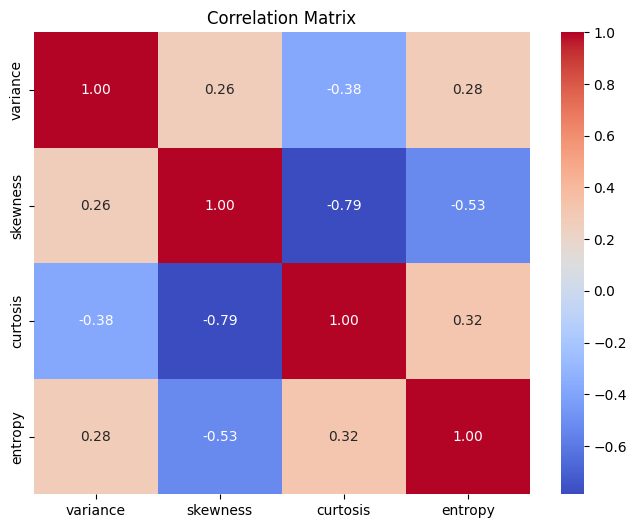

In [52]:
# Compute the correlation matrix

correlation_matrix = Data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [53]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
lower_triangle = correlation_matrix.where(mask)

# Finding the lowest absolute correlation
min_corr_abs = lower_triangle.abs().min().min()  
# Get two features
min_corr_features_abs = lower_triangle.stack()[lower_triangle.stack().abs() == min_corr_abs].index.tolist()  

print(min_corr_features_abs)

[('variance', 'skewness')]


3. Choose two features: Based on the correlation analysis, select two features that are
least correlated (e.g., variance and skewness) to visualize the Perceptron’s decision
boundary.

In [54]:
check_variable_type(y)

The variable is a NumPy array.


In [55]:
# Select two features
# Select these features from the original feature set

selected_features = Data[['variance', 'skewness']] # 0.26

print(selected_features.head())

check_variable_type(selected_features)

selected_features = selected_features.to_numpy()

check_variable_type(selected_features)

# Split the selected features into training and validation sets if not done yet

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

   variance  skewness
0   3.62160    8.6661
1   4.54590    8.1674
2   3.86600   -2.6383
3   3.45660    9.5228
4   0.32924   -4.4552
The variable is a pandas DataFrame.
The variable is a NumPy array.
Shape of X_train: (1097, 2)
Shape of X_test: (275, 2)
Shape of y_train: (1097, 1)
Shape of y_test: (275, 1)


#### Step 2: Train the Perceptron on Selected Features (10 points)

1. Retrain the Perceptron: After selecting two features, train the Perceptron using
only these two features. Use the same training and evaluation process as before,
but now the model will work in a two-dimensional feature space.

In [56]:
## Train the Perceptron model on the training set.

# Initialize the weights and bias for the Perceptron using the selected features
n_features = X_train.shape[1]
weights, bias = initialize_parameters(n_features)

# Train the Perceptron model on the training set
weights, bias = train_perceptron(X_train, y_train.flatten(), weights, bias, learning_rate, n_epochs)

# Make predictions on the training data
y_pred_train = predict(X_train, weights, bias)

# Calculate accuracy for the training set
accuracy_train = np.mean(y_pred_train == y_train.flatten()) * 100
print("Training Accuracy:", accuracy_train)

# Make predictions on the test data
y_pred_test = predict(X_test, weights, bias)

# Calculate accuracy for the test set
accuracy_test = np.mean(y_pred_test == y_test.flatten()) * 100
print("Testing Accuracy:", accuracy_test)


Training Accuracy: 86.87329079307202
Testing Accuracy: 83.27272727272728


2. Visualize the decision boundary (hyperplane): Once the Perceptron is trained, plot
the decision boundary (hyperplane) to see how the Perceptron separates the two
classes in 2D.

C:\Users\demir\AppData\Local\Temp\ipykernel_10816\586081789.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')


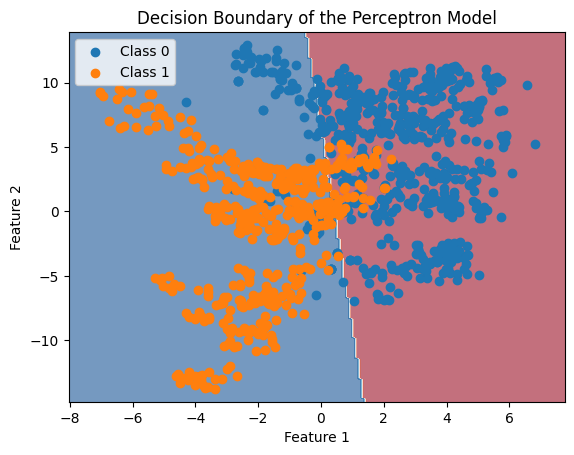

In [57]:
# Function to plot the decision boundary
def plot_decision_boundary(X, y, weights, bias, plot_title = "Decision Boundary of the Perceptron Model"):
    # Define the bounds of the domain
    min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
    min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    # Create all the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)

    # Flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # Stack the vectors to create a (N, 2) array for input to the model
    grid = np.hstack((r1, r2))

    # Make predictions for the grid
    zz = np.array([step_function(np.dot(weights, point) + bias) for point in grid])
    
    # Reshape the predictions back into a grid
    zz = zz.reshape(xx.shape)

    # Plot the decision boundary using contourf
    plt.contourf(xx, yy, zz, cmap='RdBu', alpha=0.6)

    # Scatter plot for the original data points
    for class_value in range(2):
        # Get the row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # Create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')

    # Add plot title and labels
    plt.title(plot_title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot the decision boundary using the selected features and trained model

plot_decision_boundary(X_train, y_train.flatten(), weights, bias)

#### Step 3: Experiment with Different Features (10 points)

After visualizing the decision boundary for one pair of features, try selecting different
combinations of features (e.g., variance and entropy) and retrain the Perceptron. Compare
how the hyperplane changes with different features. This helps in understanding how the
Perceptron’s decision-making process adapts to different feature sets.

Answer the guiding
questions:
1. How does the decision boundary change when you use different pairs of features?
2. Can you find a pair of features that leads to better separation between the two
classes?

In [58]:
# Suppose these are the original feature names in the order they appear in the NumPy array
feature_names = ['variance', 'skewness', 'kurtosis', 'entropy']

# Mapping feature names to their indices
feature_index_map = {name: idx for idx, name in enumerate(feature_names)}

def experiment_with_feature_pairs(X, y, feature_pairs):
    for features in feature_pairs:
        # Get the indices for the selected features
        feature_indices = [feature_index_map[feature] for feature in features]
        
        # Select the two features from the original dataset using the indices
        X_selected = X[:, feature_indices]
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
        
        # Initialize the weights and bias for the Perceptron
        n_features = X_train.shape[1]
        weights, bias = initialize_parameters(n_features)

        # Train the Perceptron model on the training set
        weights, bias = train_perceptron(X_train, y_train.flatten(), weights, bias, learning_rate, n_epochs)

        # Make predictions on the training data
        y_pred_train = predict(X_train, weights, bias)
        # Calculate accuracy for the training set
        accuracy_train = np.mean(y_pred_train == y_train.flatten()) * 100
        print(f"Training Accuracy for features {features}: {accuracy_train:.2f}%")

        # Make predictions on the test data
        y_pred_test = predict(X_test, weights, bias)
        # Calculate accuracy for the test set
        accuracy_test = np.mean(y_pred_test == y_test.flatten()) * 100
        print(f"Testing Accuracy for features {features}: {accuracy_test:.2f}%")

        # Plot the decision boundary
        plot_decision_boundary(X_train, y_train.flatten(), weights, bias)


Training Accuracy for features ('variance', 'skewness'): 86.87%
Testing Accuracy for features ('variance', 'skewness'): 83.27%


C:\Users\demir\AppData\Local\Temp\ipykernel_10816\586081789.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')


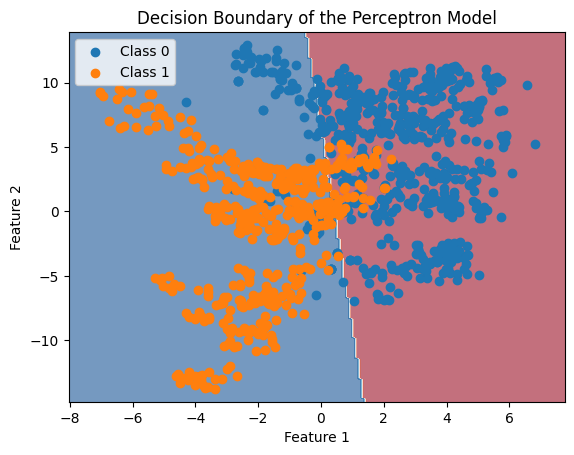

Training Accuracy for features ('variance', 'entropy'): 82.95%
Testing Accuracy for features ('variance', 'entropy'): 81.82%


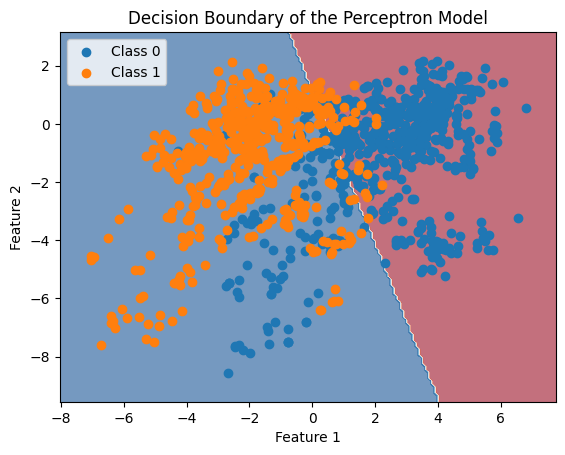

Training Accuracy for features ('skewness', 'kurtosis'): 77.58%
Testing Accuracy for features ('skewness', 'kurtosis'): 77.09%


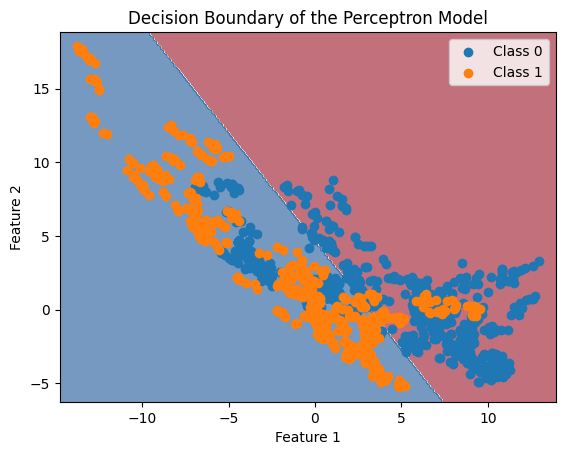

In [59]:
# Define different feature pairs to experiment with
feature_pairs = [('variance', 'skewness'), ('variance', 'entropy'), ('skewness', 'kurtosis')]

# Perform the experiments
experiment_with_feature_pairs(X, y, feature_pairs)

### Answers : 

* ___When using different feature pairs, the decision boundary shifts according to the data distribution in the selected feature space. For instance, the combination of "variance" and "skewness" yielded higher accuracy than "skewness" and "kurtosis," indicating that the decision boundary was more effective at separating the classes with the former pair. This suggests that some feature pairs contain more discriminative information for classification. The low correlation between variance and skewness likely contributes to their effectiveness, allowing the Perceptron to form a more distinct decision boundary.___

* ___The pair "variance" and "skewness" provided better separation, as shown by the higher training accuracy (86.87%) and testing accuracy (83.27%) compared to other pairs. This indicates that this combination is more effective at distinguishing between the classes, resulting in a decision boundary that accurately separates the data points. In contrast, "skewness" and "kurtosis" showed lower accuracy, suggesting a less effective decision boundary for that pair of features.___

#### Bonus Step 4: Incrementally Add Data (+ 5 points)

1. Visualizing Incremental Learning: Another experiment to help understand the behavior of the Perceptron is to add data incrementally. Start with a small portion of
the dataset and progressively add more data points to train the Perceptron.

In [60]:
def visualize_incremental_learning(X, y, initial_size, increment_size, max_size):
    """
    Visualize the decision boundary of the Perceptron as more data is added incrementally.
    
    Parameters:
    X (numpy.ndarray): Feature data.
    y (numpy.ndarray): Target labels.
    initial_size (int): Number of samples to start with.
    increment_size (int): Number of samples to add in each step.
    max_size (int): Maximum number of samples to include.
    """
    # Create a Perceptron model
    learning_rate = 0.01
    n_epochs = 1000
    n_features = X.shape[1]
    
    # Initialize weights and bias
    weights, bias = initialize_parameters(n_features)

    # Initialize the list to store the sizes of training data used
    sizes = []
    accuracies = []

    # Incrementally add data and visualize
    for size in range(initial_size, max_size + 1, increment_size):
        # Select the subset of data
        X_subset = X[:size]
        y_subset = y[:size].flatten()

        # Train the Perceptron on the current subset
        weights, bias = train_perceptron(X_subset, y_subset, weights, bias, learning_rate, n_epochs)

        # Make predictions and calculate accuracy
        y_pred = predict(X_subset, weights, bias)
        accuracy = np.mean(y_pred == y_subset) * 100
        
        sizes.append(size)
        accuracies.append(accuracy)

        title = f'Decision Boundary with {size} Samples (Accuracy: {accuracy:.2f}%)'
        # Visualize the decision boundary
        plot_decision_boundary(X_subset, y_subset, weights, bias, plot_title=title)
        print(title)

    return sizes, accuracies

2. Observe how the decision boundary shifts: As you add more data, observe how the
hyperplane shifts and adapts to new points. This will help you understand how the
Perceptron continuously adjusts the boundary to separate the classes.

C:\Users\demir\AppData\Local\Temp\ipykernel_10816\586081789.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label=f'Class {class_value}')


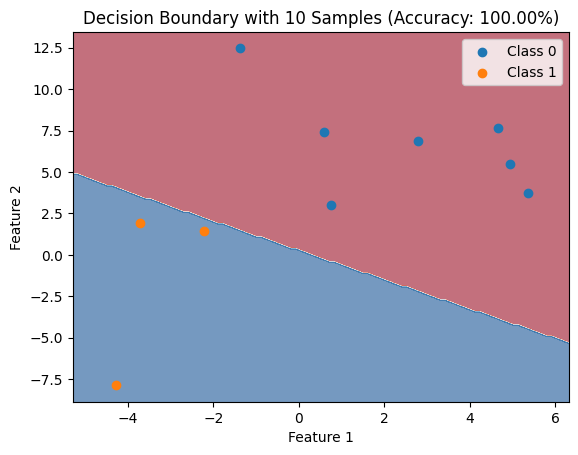

Decision Boundary with 10 Samples (Accuracy: 100.00%)


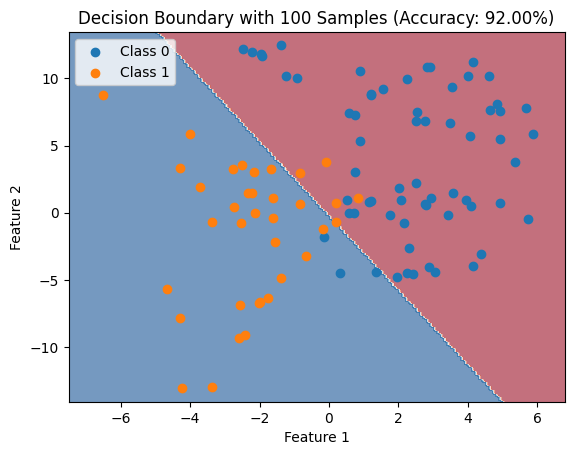

Decision Boundary with 100 Samples (Accuracy: 92.00%)


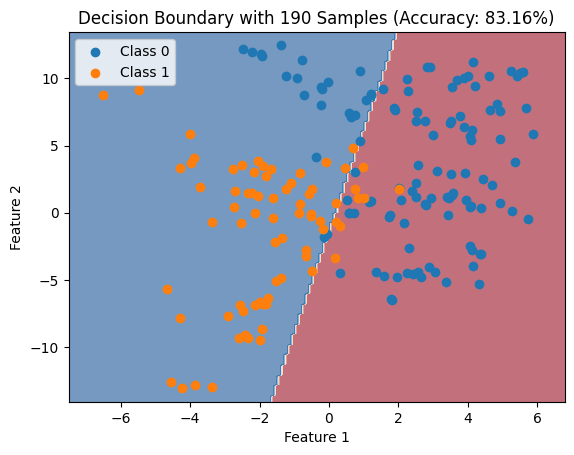

Decision Boundary with 190 Samples (Accuracy: 83.16%)


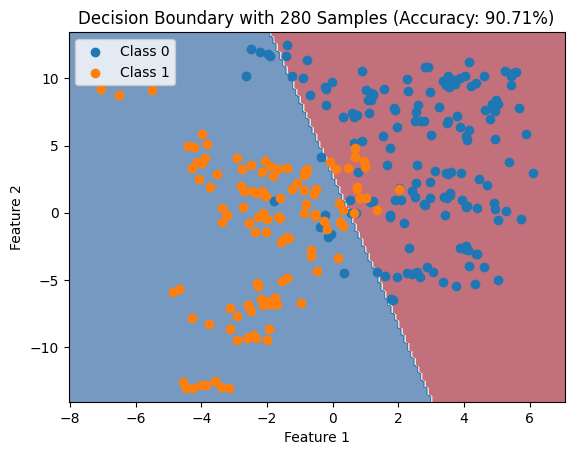

Decision Boundary with 280 Samples (Accuracy: 90.71%)


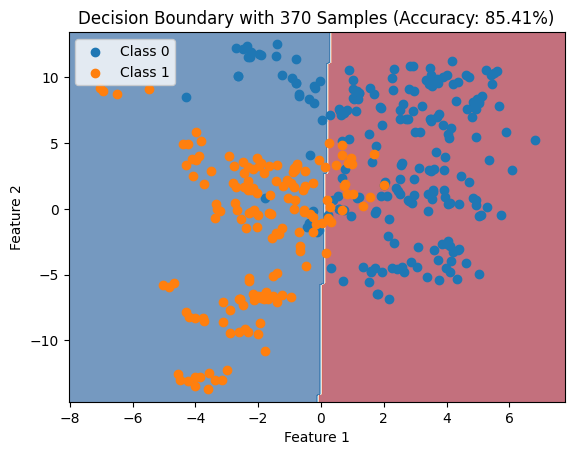

Decision Boundary with 370 Samples (Accuracy: 85.41%)


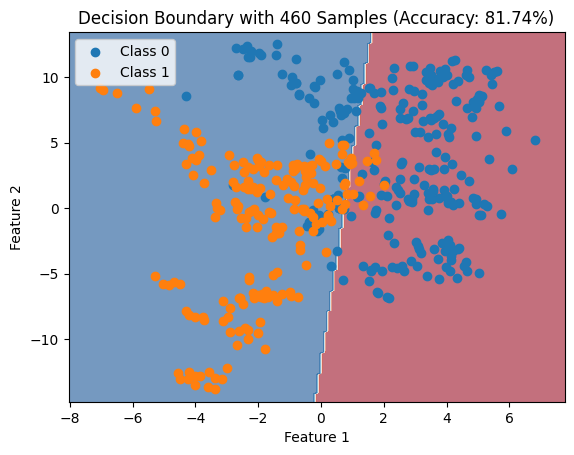

Decision Boundary with 460 Samples (Accuracy: 81.74%)


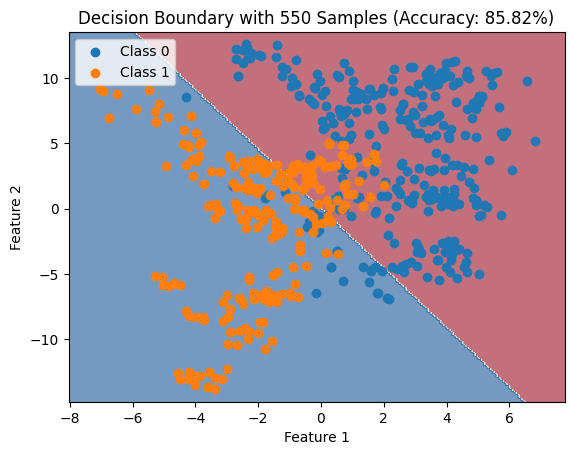

Decision Boundary with 550 Samples (Accuracy: 85.82%)


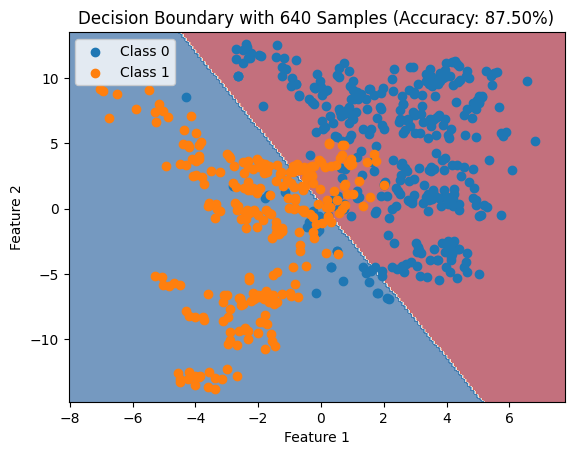

Decision Boundary with 640 Samples (Accuracy: 87.50%)


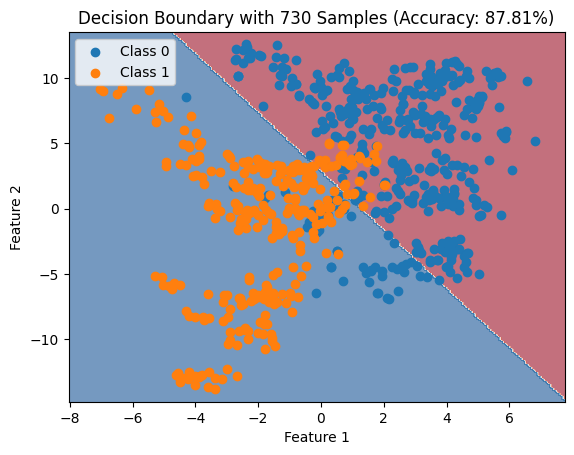

Decision Boundary with 730 Samples (Accuracy: 87.81%)


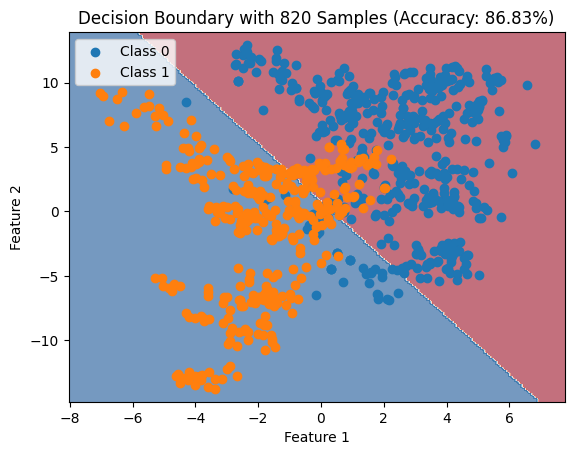

Decision Boundary with 820 Samples (Accuracy: 86.83%)


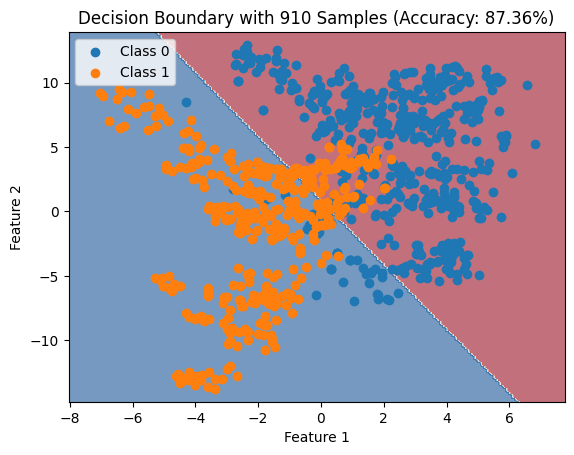

Decision Boundary with 910 Samples (Accuracy: 87.36%)


In [61]:
# Parameters for incremental learning
initial_size = 10     # Start with 10 samples
increment_size = 90   # Add 90 samples each time
max_size = 910        # Maximum samples to use

# Call the function to visualize
sizes, accuracies = visualize_incremental_learning(X_train, y_train, initial_size, increment_size, max_size)

### Answers : 

1. ___How does the decision boundary evolve as more data is added?
    As more data points are added, the decision boundary changes in shape and position. With just 10 samples, the Perceptron had perfect accuracy (100%), showing that the small dataset was easily separable. When the sample size increased to 100, accuracy dropped to 92%, indicating the model adjusted the boundary to fit a more complex dataset. The accuracy continued to fluctuate with more samples, ranging from 81.74% to 92%, highlighting how the model adapts to new patterns in the data.___

2. ___Does the Perceptron find a stable boundary after a certain number of data points?
    Yes, the Perceptron seems to reach a stable boundary after a certain number of data points. After about 560 samples, the accuracy levels off around the %85-88 range, suggesting that the model has learned enough about the data to maintain consistent performance.___

3. ___How sensitive is the model to the order in which data points are introduced? My observation is : If early samples are representative of the overall data, the model may learn quickly and find a stable boundary. However, if the initial samples are not typical, the decision boundary might not adapt well, causing fluctuations in accuracy. This means the order in which data is introduced can affect how effectively the model learns and stabilizes.___

#### Step 5: Analyzing the Hyperplane (5 points)

After running the experiments, analyze the hyperplane’s behavior across different feature
sets and data inputs. Reflect on how the Perceptron algorithm adapts to the data and how
different feature combinations lead to different decision boundaries. Answer the guiding
questions:
1. Why does the hyperplane change with different features or data points?
2. How does the decision boundary relate to the linearly separable nature of the data?

1. ___Why does the hyperplane change with different features? The hyperplane changes with different features because each pair of features has varying degrees of correlation with the target classes. Features with low correlation may provide distinct information, allowing the model to form a more effective decision boundary. Conversely, highly correlated features may not capture unique distinctions, resulting in less optimal hyperplanes.___

2. ___How does the decision boundary relate to the linear separability of the data? The decision boundary reflects the linear separability of the data by indicating how well the classes can be separated using a linear function. If the classes are linearly separable, the hyperplane will effectively divide them with high accuracy. However, if they are not, the model may struggle to find a suitable boundary, resulting in lower accuracy and potential misclassifications.___

#### Step 6: Fisher’s Linear Discriminant Projection (10 points)

In this step, you will implement Fisher’s Linear Discriminant (LD) to project the
dataset onto a 1D space and visualize the distribution of the two classes in the projected
space using a histogram. The goal of Fisher’s LD is to find the direction in the feature
space that maximizes the separation between two classes while minimizing the variance
within each class. This technique projects the data onto a single dimension where the
separation between the classes is optimized.

In [62]:
check_variable_type(X)
check_variable_type(y)

The variable is a NumPy array.
The variable is a NumPy array.


In [63]:
def fisher_ld_projection(X, y):
    """Compute Fisher's Linear Discriminant projection direction."""
    # Separate the classes
    classes = np.unique(y)
    
    # Calculate mean vectors for each class
    mean_vectors = [np.mean(X[y == c], axis=0) for c in classes]
    
    # Calculate the overall mean
    overall_mean = np.mean(X, axis=0)
    
    # Compute within-class scatter matrix
    S_W = np.zeros((X.shape[1], X.shape[1]))
    for cl, mean_vec in zip(classes, mean_vectors):
        class_scatter = np.cov(X[y == cl].T) * (len(X[y == cl]) - 1)
        S_W += class_scatter

    # Compute between-class scatter matrix
    S_B = np.zeros((X.shape[1], X.shape[1]))
    for i, mean_vec in enumerate(mean_vectors):
        n = X[y == classes[i]].shape[0]
        mean_diff = (mean_vec - overall_mean).reshape(X.shape[1], 1)
        S_B += n * (mean_diff).dot(mean_diff.T)

    # Compute the eigenvalues and eigenvectors for the matrix S_W^-1 * S_B
    eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
    
    # Sort the eigenvalues and eigenvectors
    sorted_indices = np.argsort(eig_vals)[::-1]
    sorted_eigenvalues = eig_vals[sorted_indices]
    sorted_eigenvectors = eig_vecs[:, sorted_indices]
    
    # The optimal projection direction is the first eigenvector
    w = sorted_eigenvectors[:, 0]

    # Normalize the direction vector
    w /= np.linalg.norm(w)

    return w

def project_data(X, direction):
    """Project data onto the Fisher LD direction."""
    return X.dot(direction)

In [64]:
direction = fisher_ld_projection(X, y.flatten())

# Project the data onto the Fisher LD direction
projected_data = project_data(X, direction)

While not mandatory, it can be highly instructive to visualize the projection direction computed by Fisher’s LD in the original 2D feature space. This will help you understand how the data is being projected onto a 1D space and why this direction is optimal for class separation.

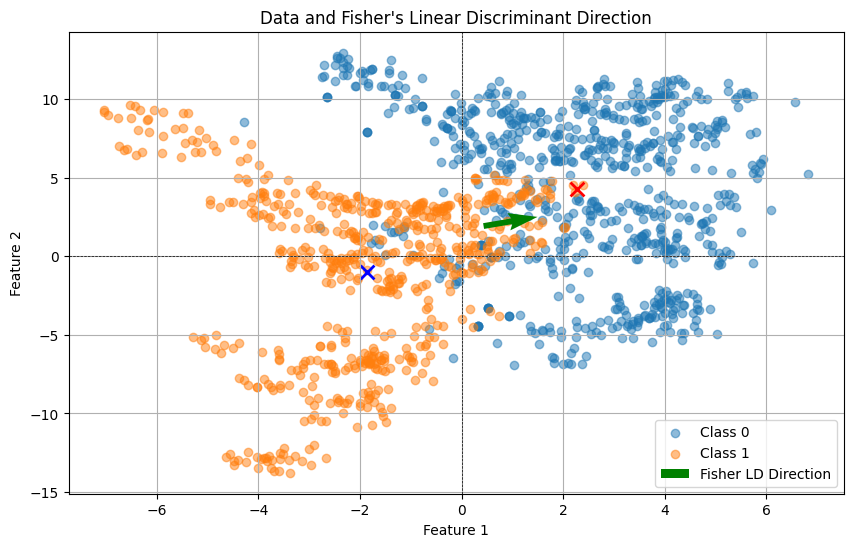

In [65]:
# Plot the 2D data with the projection direction

# Hint: You can use plt.scatter() to plot the 2D data with its features
# You can find the mean of the entire dataset for placing the direction vector
# Hint: You can use plt.quiver() method to visualize the direction vector 
# Do not forget to scale the direction vector to visualize it properly
# scale = 4 # Adjust this to control the length of the direction line


def plot_data_with_projection(X, y, direction):
    plt.figure(figsize=(10, 6))
    # Plot each class in the dataset
    for label, color in zip(np.unique(y), ['red', 'blue']):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}', alpha=0.5)

    # Calculate means for plotting
    mean_vectors = [np.mean(X[y == c], axis=0) for c in np.unique(y)]
    overall_mean = np.mean(X, axis=0)

    # Plot mean vectors
    for mean_vec, color in zip(mean_vectors, ['red', 'blue']):
        plt.scatter(mean_vec[0], mean_vec[1], color=color, marker='x', s=100, linewidth=2)

    # Plot the direction vector for Fisher's LD
    scale = 0.7  # Adjust this to control the length of the direction line
    plt.quiver(overall_mean[0], overall_mean[1], direction[0], direction[1], 
               angles='xy', scale_units='xy', scale=scale, color='green', label='Fisher LD Direction')

    plt.title('Data and Fisher\'s Linear Discriminant Direction')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axhline(0, color='black',linewidth=0.5, ls='--')
    plt.axvline(0, color='black',linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

plot_data_with_projection(X, y.flatten(), direction)

Plot a histogram showing the distribution of the
projected data for each class in the 1D space. The histogram will help you visualize
how well the two classes are separated by the Fisher’s LD projection.

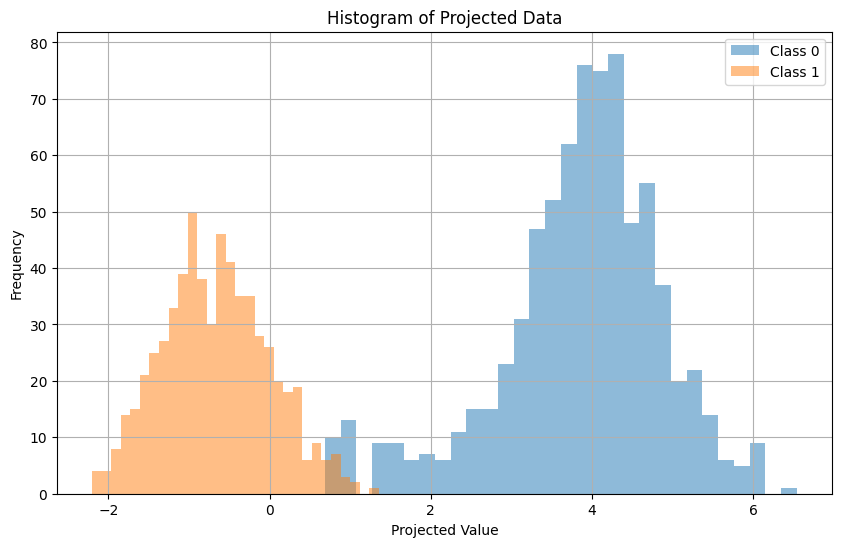

In [66]:
# Plot the histogram of the projected data
# Call the function to plot
def plot_histogram(projected_data, y):
    """Plot histogram of the projected data for each class."""
    plt.figure(figsize=(10, 6))
    for label in np.unique(y):
        plt.hist(projected_data[y == label], bins=30, alpha=0.5, label=f'Class {label}')
    plt.title('Histogram of Projected Data')
    plt.xlabel('Projected Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

# Plot histogram of the projected data
plot_histogram(projected_data, y.flatten())

Answer the guiding questions:
1. How well does Fisher’s LD separate the two classes in the 1D projected space?
2. Compare the separation of the two classes in the original 2D space (used in the
Perceptron) versus the 1D Fisher’s LD projection. What do you observe about the
class distributions in these spaces?

### Answers

* ___In the 1D projected space (shown in the histogram), Fisher’s Linear Discriminant provides a fairly effective separation between the two classes. The two distributions are mostly distinct, with minimal overlap. This indicates that Fisher's LD effectively projects the data along a direction that maximizes the separation between the two classes, making it easier to distinguish between them in 1D.___

* ___In the original 2D space, the decision boundary created by the Perceptron is able to separate the two classes but not perfectly, as there is some overlap along the boundary. The Perceptron's linear boundary does not capture the distributions of the two classes as clearly as Fisher’s LD does.
In contrast, in the 1D Fisher’s LD projection, the separation is more distinct, with most of Class 0 projected to the right and most of Class 1 to the left. The Fisher’s LD projection direction (shown in the 2D plot with a green arrow) is chosen to maximize the distance between the means of the two classes while minimizing within-class variance, leading to a clearer separation in the 1D space than what the Perceptron achieved in 2D.___

What insights can you gain from using Fisher’s LD for dimensionality reduction and class separation?

* Clear Separation in 1D: Fisher’s LD projects data onto a single line (1D) in a way that separates classes as much as possible. In the histogram, we can see each class mostly separate, making it easy to tell them apart.

* Reduces Overlap and Noise: In the original 2D space, some points from different classes overlap, which can lead to misclassifications. Fisher’s LD reduces this overlap by focusing on directions that best separate the classes, minimizing noise.

* Simplifies Data for Classification: By reducing the data to one dimension, Fisher’s LD keeps only the essential information, making it useful for simple models and visualizations, especially with complex or high-dimensional data.

### Reflect on the outcomes of your experiments. Discuss the strengths and limitations of your models, as well as any challenges encountered during the implementation process.

In reflecting on the outcomes of our experiments with the Perceptron and Fisher Linear Discriminant models, several strengths and limitations emerge. The Perceptron model is straightforward to implement and works well with linearly separable data, showing good performance in classification tasks, particularly with high precision and recall. However, it struggles with non-linear separations and can be sensitive to outliers. On the other hand, Fisher Linear Discriminant provides a more robust approach by maximizing the separation between classes, making it effective for multi-class problems. A challenge encountered during implementation was selecting the right feature pairs, as the choice significantly influenced model performance and decision boundaries. Overall, while both models have their advantages, careful consideration of the data characteristics and feature selection is crucial for achieving optimal results.